In [1]:
#בפרויקט זה אשתמש בדאטה בייס שיצרתי בפרויקט הראשון בקורס, שמציג נתוני עסק קייטרינג לשנת 2022
#אני מתכנן לבדוק נתוני הזמנה בקרב לקוחות לפי זמן, מיקום גיאוגרפי, סוג הלקוח, אופן ההזמנה ותוכן ההזמנות, והאם ניתן למצוא מגמות שמהן ניתן להסיק מסקנות עתידיות משמעותיות עבור העסק
#באמצעות הספריות אני אייבא את הטבלאות הרלוונטיות, אקבץ את המידע ואצור גרפים מתאימים

In [2]:
#ייבוא ספריות
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [3]:
#אני מייבא את הטבלאות הרלוונטיות מתוך הדאטה בייס המקורי
a=pd.read_csv("QLcustomers.csv")
b=pd.read_csv("QLmenu.csv")
c=pd.read_csv("QLorders.csv")
d=pd.read_csv("QLdeliveries.csv")
e=pd.read_csv("QLmenu_categories.csv")
f=pd.read_csv("QLorders_info.csv")

In [4]:
#טבלת לקוחות שכוללת מזהה, שם, סוג הלקוח, כתובת, עיר וטלפון
a

,customer_id,customer_name,customer_type,delivery_address,city,phone
0,1,Dana Azrieli,private,Hayarkon 200,Tel Aviv,052-4837423
1,2,Assaf Amdurski,private,Hameyasdim 42,Ramat Hasharon,054-4876632
2,3,Softshare,company,Habrzel 20,Tel Aviv,054-4599112
3,4,Onpoint,company,Karlibach 16,Tel Aviv,050-5220133
4,5,Efrat Finkelshtein,private,Sirkin 2,Bat Yam,052-7744201
5,6,Quickline,company,Jabotinski 50,Ramat Gan,052-3942211
6,7,Dori Media,company,Habarzel 8,Tel Aviv,054-4703999
7,8,Alona Davidi,private,Harav Kuk 30,Hertzeliya,052-5322934
8,9,Tel Aviv Municipality,company,Ibn Gabirol 66,Tel Aviv,054-4955123
9,10,Strong Gym,company,Hertzel 52,Holon,052-3622966


In [5]:
#טבלת התפריט שמציגה מזהה,שם המנה, קטגוריה בתפריט, המחיר שלה והעמדה במטבח שבה הוכנה
b

,dish_id,dish_name,category_id,dish_price,station_id
0,1,moroccan tofu,1,80.0,1
1,2,artichoke chard,1,80.0,1
2,3,aloo gobi,1,75.0,1
3,4,indonesian curry,1,80.0,1
4,5,thai curry,1,80.0,1
5,6,dal makani,1,75.0,1
6,7,chili non carne,1,80.0,1
7,8,quinoam salad,2,70.0,2
8,9,kholrabi fennel,2,70.0,2
9,10,lentils yams,2,65.0,2


In [6]:
#טבלת הזמנות, שכוללת מזהי הזמנה, לקוח, משלוח ואופן הזמנה
c

,order_id,customer_id,delivery_id,order_source
0,1,14,1,site
1,2,20,2,app
2,3,18,3,phone
3,4,15,4,app
4,5,10,5,phone
5,6,19,6,site
6,7,8,7,app
7,8,4,8,app
8,9,2,9,phone
9,10,6,10,app


In [7]:
#טבלת משלוחים שמראה מזהי משלוח ולקוח, תאריך הזמנה,תאריך משלוח, סוג ההזמנה, כתובת למשלוח ועיר
d

,delivery_id,customer_id,order_date,delivery_date,delivery_type,delivery_address,city
0,1,14,2022-11-12 00:00:00.000,2022-11-19 00:00:00.000,regular,Begin 144,Tel Aviv
1,2,20,2022-02-13 00:00:00.000,2022-02-20 00:00:00.000,regular,Homa Umigdal 29,Tel Aviv
2,3,18,2022-12-17 00:00:00.000,2022-12-24 00:00:00.000,express,Tagor 15,Tel Aviv
3,4,15,2022-10-01 00:00:00.000,2022-11-01 00:00:00.000,regular,Expo Tel Aviv Hangar 15,Tel Aviv
4,5,10,2022-06-27 00:00:00.000,2022-07-04 00:00:00.000,regular,Hertzel 52,Holon
5,6,19,2022-09-11 00:00:00.000,2022-09-25 00:00:00.000,regular,Montifiori 18,Raanana
6,7,8,2022-03-25 00:00:00.000,2022-04-04 00:00:00.000,express,Harav Kuk 30,Hertzeliya
7,8,4,2022-07-03 00:00:00.000,2022-07-08 00:00:00.000,regular,Karlibach 16,Tel Aviv
8,9,2,2022-03-20 00:00:00.000,2022-04-04 00:00:00.000,regular,Hameyasdim 42,Ramat Hasharon
9,10,6,2022-06-03 00:00:00.000,2022-06-10 00:00:00.000,regular,Jabotinski 50,Ramat Gan


In [8]:
#טבלת קטגוריות תפריט, שכוללת את שם הקטגוריה בתפריט ומזהי קטגוריה ועמדת הכנה במטבח
e

,category_id,category_name,station_id
0,1,entrees,1
1,2,salads,2
2,3,first_course,2
3,4,soups,1
4,5,side_dishes,2
5,6,quiches,3
6,7,pastries,3
7,8,desserts,3


In [10]:
#טבלת פרטי הזמנות, שמציגה מזהי הזמנה, מנה, מחיר המנה והכמות שהוזמנה
f

,order_id,dish_id,dish_price,amount
0,1,30,100.0,2
1,1,31,100.0,2
2,1,34,100.0,2
3,1,36,120.0,2
4,2,1,80.0,2
...,...,...,...,...
66,20,25,25.0,2
67,20,35,100.0,2
68,20,37,80.0,4
69,20,39,75.0,3


In [11]:
#אמזג את הטבלאות לטבלה אחת חדשה שתהיה נוחה לעבודה והצגת כל הנתונים
df1=c.merge(f).merge(a).merge(b).merge(d).merge(e)

In [54]:
#מהטבלה החדשה אסיר עמודות לא רלוונטיות
#df1.drop(columns={'customer_id'},inplace=True)
#df1.drop(columns={'dish_id'},inplace=True)
#df1.drop(columns={'customer_name'},inplace=True)
#df1.drop(columns={'delivery_id'},inplace=True)
#df1.drop(columns={'delivery_address'},inplace=True)
#df1.drop(columns={'category_id'},inplace=True)
#df1.drop(columns={'phone'},inplace=True)
#df1.drop(columns={'station_id'},inplace=True)
#df1.drop(columns={'order_date'},inplace=True)
df1.drop(columns={'delivery_type'},inplace=True)

In [14]:
#כדי ליצור עמודת חודשים אשתמש בעמודת תאריך משלוח ואמיר אותה בהתאם
df1.delivery_date=pd.to_datetime(df1.delivery_date)
df1['month']=df1['delivery_date'].dt.month

In [55]:
#ואצור עמודת חשבון סופי לכל שורת הזמנה על ידי הכפלת מחיר המנה בכמות ההזמנה
df1['Total_Bill']=df1['dish_price']*df1['amount']
df1

,order_id,order_source,dish_price,amount,customer_type,city,dish_name,delivery_date,category_name,month,Total_Bill
0,1,site,100.0,2,company,Tel Aviv,chard spinach,2022-11-19,quiches,11,200.0
1,1,site,100.0,2,company,Tel Aviv,mushroom,2022-11-19,quiches,11,200.0
2,1,site,100.0,2,company,Tel Aviv,brocolli almonds,2022-11-19,quiches,11,200.0
3,1,site,120.0,2,company,Tel Aviv,rainbow,2022-11-19,quiches,11,240.0
4,2,app,80.0,2,company,Tel Aviv,moroccan tofu,2022-02-20,entrees,2,160.0
5,2,app,70.0,1,company,Tel Aviv,kholrabi fennel,2022-02-20,salads,2,70.0
6,2,app,65.0,2,company,Tel Aviv,badrijani,2022-02-20,first_course,2,130.0
7,2,app,70.0,1,company,Tel Aviv,skordalia,2022-02-20,first_course,2,70.0
8,3,phone,65.0,3,private,Tel Aviv,tabooleh,2022-12-24,salads,12,195.0
9,3,phone,100.0,3,private,Tel Aviv,mushroom,2022-12-24,quiches,12,300.0


In [16]:
#ניתוח סטטיסטי תיאורי
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       56 non-null     int64         
 1   order_source   56 non-null     object        
 2   dish_price     56 non-null     float64       
 3   amount         56 non-null     int64         
 4   customer_type  56 non-null     object        
 5   city           56 non-null     object        
 6   dish_name      56 non-null     object        
 7   delivery_date  56 non-null     datetime64[ns]
 8   delivery_type  56 non-null     object        
 9   category_name  56 non-null     object        
 10  month          56 non-null     int32         
 11  Total_Bill     56 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 5.2+ KB


In [17]:
#נתונים סטטיסטיים המציגים עבור כל עמודה בין היתר ערכי ממוצע בשורה 2, מינימום בשורה 3, חציון בשורה 5, מקסימום בשורה 7 וסטיית תקן בשורה 8
df1.describe()

,order_id,dish_price,amount,delivery_date,month,Total_Bill
count,56.000000,56.000000,56.000000,56,56.000000,56.000000
mean,10.625000,78.125000,2.875000,2022-07-18 03:00:00,7.071429,222.767857
min,1.000000,50.000000,1.000000,2022-01-07 00:00:00,1.000000,50.000000
25%,6.000000,68.750000,2.000000,2022-04-04 00:00:00,4.000000,140.000000
50%,10.000000,77.500000,3.000000,2022-06-27 12:00:00,6.500000,200.000000
75%,15.250000,82.500000,4.000000,2022-11-19 00:00:00,11.000000,300.000000
max,20.000000,120.000000,6.000000,2022-12-24 00:00:00,12.000000,450.000000
std,6.291589,15.152633,1.477867,NaN,3.510282,112.192690


In [66]:
#מהן 5 המנות הפופולריות ביותר? אלו מנות התפריט לפי סדר יורד של כמות הפעמים שהוזמנו
df1.groupby('dish_name')['amount'].sum().sort_values(ascending=False).head()

dish_name
artichoke chard    10
spring rolls       10
calzone             9
fatayer             9
mushroom            8
Name: amount, dtype: int64

In [50]:
#מהן 5 המנות הרווחיות ביותר? אקבץ את הנתונים לפי שם המנה, אחשב את סך החשבון הסופי ואציג בסדר יורד את 5 התוצאות הראשונות
df1.groupby('dish_name')['Total_Bill'].sum().sort_values(ascending=False).head()

dish_name
artichoke chard    800.0
mushroom           800.0
calzone            720.0
spring rolls       700.0
fatayer            675.0
Name: Total_Bill, dtype: float64

In [51]:
#איזה סוג לקוח הכניס יותר?
#ניתן לראות שבפער גדול, לקוחות פרטיים הכניסו יותר כסף מאשר חברות
df1.groupby('customer_type')['Total_Bill'].sum()

customer_type
company    2605.0
private    9870.0
Name: Total_Bill, dtype: float64

In [63]:
#אני רוצה לבדוק אלו מנות הוזמנו הכי פחות פעמים, לכן אבצע סינון
#רואים שלא מעט ממנות אלו הן בעלות מחיר גבוה יחסית לשאר וייתכן שזו הסיבה לכמות ההזמנות המעטה
df1[['dish_name','category_name','dish_price','amount']][df1['amount']<3]

,dish_name,category_name,dish_price,amount
0,chard spinach,quiches,100.0,2
1,mushroom,quiches,100.0,2
2,brocolli almonds,quiches,100.0,2
3,rainbow,quiches,120.0,2
4,moroccan tofu,entrees,80.0,2
5,kholrabi fennel,salads,70.0,1
6,badrijani,first_course,65.0,2
7,skordalia,first_course,70.0,1
12,indonesian curry,entrees,80.0,1
20,dal makani,entrees,75.0,1


In [22]:
#מהי כמות ההזמנות לפי חודש? אגדיר טבלה חדשה שבה אציג את כמות ההזמנות ללא כפילויות, ואציג זאת בגרף line
daily_unique_orders=df1.groupby('month')['order_id'].nunique().reset_index()
daily_unique_orders.rename(columns={'order_id':'UniqueOrderCount'}, inplace=True)

<Figure size 1000x600 with 0 Axes>

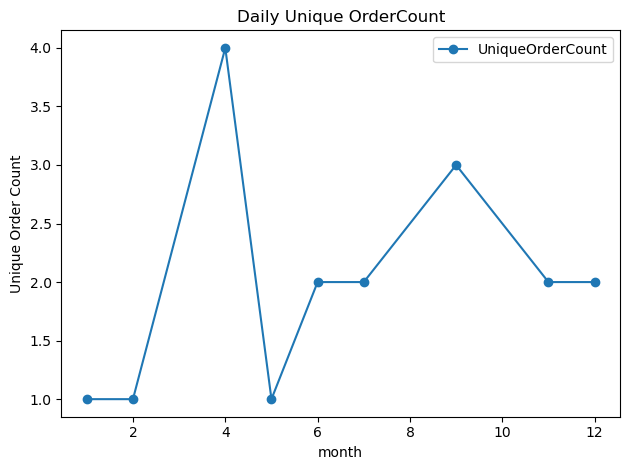

In [23]:
#ניתן לראות שהכי הרבה הזמנות נכנסו באפריל ובספטמבר וייתכן שהסיבה לכך היא תקופת החגים
plt.figure(figsize=(10,6))
daily_unique_orders.plot(x='month',y='UniqueOrderCount', kind='line',marker='o')
plt.title('Daily Unique OrderCount')
plt.xlabel('month')
plt.ylabel('Unique Order Count')
plt.tight_layout()
plt.show()

In [25]:
#מהי כמות ההזמנות לפי עיר בסדר יורד?
df1.groupby('city')['order_id'].count().sort_values(ascending=False)

city
Tel Aviv          20
Ashdod             7
Ramat Gan          6
Givatayim          4
Hertzeliya         4
Ramat Hasharon     4
Bat Yam            3
Raanana            3
Natanya            2
Yavne              2
Holon              1
Name: order_id, dtype: int64

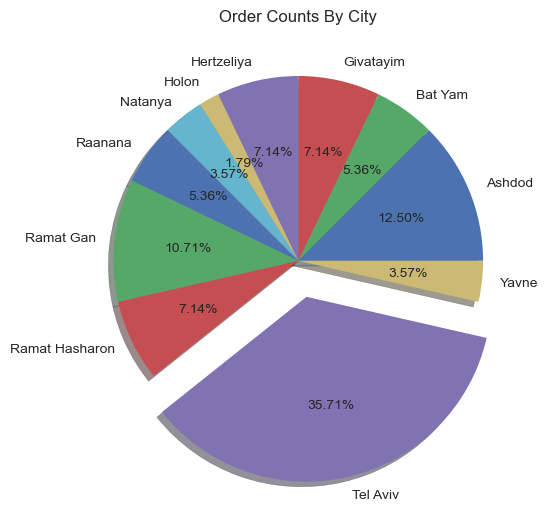

In [30]:
#על מנת להציג זאת בגרף עוגה, אצור טבלה חדשה ואציג אחוזי כמות הזמנה והחלק הגדול ביותר בולט החוצה
#ניתן לראות שתל אביב מובילה בפער ניכר, וסיבה סבירה לכך היא כמות הטבעונים הגדולה בהשוואה לערים אחרות
city_order=df1.groupby('city')['order_id'].count()
max_index=city_order.argmax()
plt.figure(figsize=(15,6))
plt.style.use('seaborn-v0_8')
plt.pie(city_order,labels=city_order.index,autopct="%1.2f%%",explode=(0,0,0,0,0,0,0,0,0,0.2,0),shadow=True)
plt.title("Order Counts By City")
plt.show()

In [32]:
#מהן ההכנסות הגדולות ביותר לפי עיר?
#בהשוואה לכמות הזמנות לפי עיר ברשימה הקודמת, אפשר לראות ששתיהן לא זהות לגמרי. רמת השרון למשל נמצאת במיקום גבוה יותר,
#כלומר הכניסה יותר כסף מגבעתיים למרות שכמות ההזמנות דווקא לא גדולה יותר מזו של גבעתיים
df1.groupby('city')['Total_Bill'].sum().sort_values(ascending=False)

city
Tel Aviv          3220.0
Ramat Gan         1615.0
Ashdod            1590.0
Ramat Hasharon    1570.0
Givatayim         1410.0
Hertzeliya        1200.0
Raanana            800.0
Bat Yam            420.0
Yavne              300.0
Natanya            270.0
Holon               80.0
Name: Total_Bill, dtype: float64

<Axes: ylabel='city'>

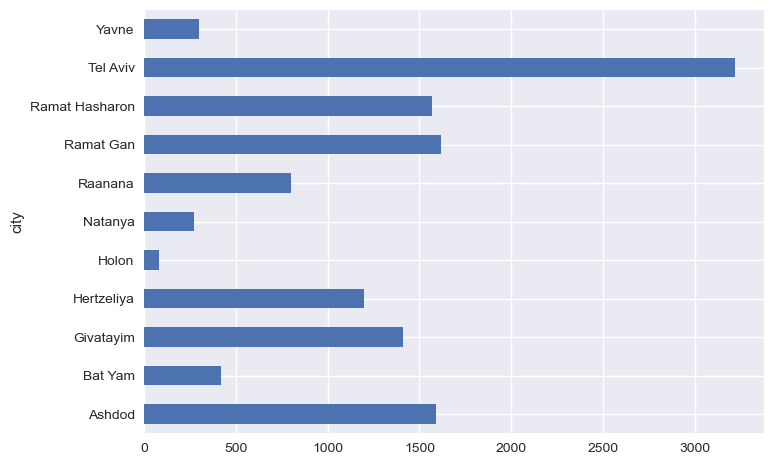

In [33]:
#ובגרף עמודות אופקי
df1.groupby('city')['Total_Bill'].sum().plot(kind='barh')

In [35]:
#מהי הרווחיות לפי הקטגוריות בתפריט בסדר יורד?
#מרקים נמצאים בתחתית הרשימה, אולי בגלל שזה עניין עונתי ואולי זה גם תלוי בסוג הלקוח
df1.groupby('category_name')['Total_Bill'].sum().sort_values(ascending=False)

category_name
quiches         2940.0
pastries        2195.0
entrees         1975.0
first_course    1930.0
salads          1540.0
desserts        1070.0
soups            825.0
Name: Total_Bill, dtype: float64

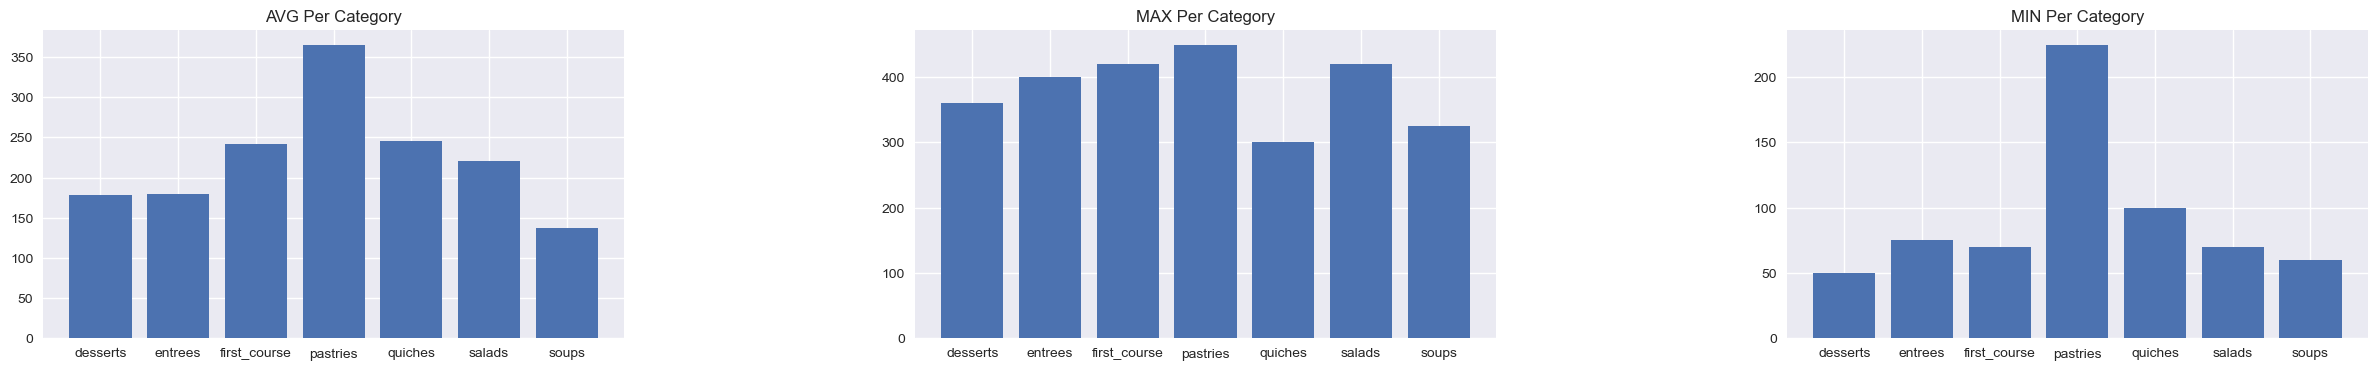

In [39]:
#אלו ערכי הממוצע, מינימום ומקסימום של רווחים לפי קטגוריות, כפי שמוצגים בגרפי subplot
mask1=df1.groupby('category_name')['Total_Bill'].mean()
mask2=df1.groupby('category_name')['Total_Bill'].max()
mask3=df1.groupby('category_name')['Total_Bill'].min()
plt.figure(figsize=(30,4))
plt.subplot(1,3,1)
plt.bar(mask1.index,mask1)
plt.title('AVG Per Category')
plt.subplot(1,3,2)
plt.bar(mask2.index,mask2)
plt.title('MAX Per Category')
plt.subplot(1,3,3)
plt.bar(mask3.index,mask3)
plt.title('MIN Per Category')
plt.subplots_adjust(wspace=0.5)

<Axes: xlabel='month', ylabel='count'>

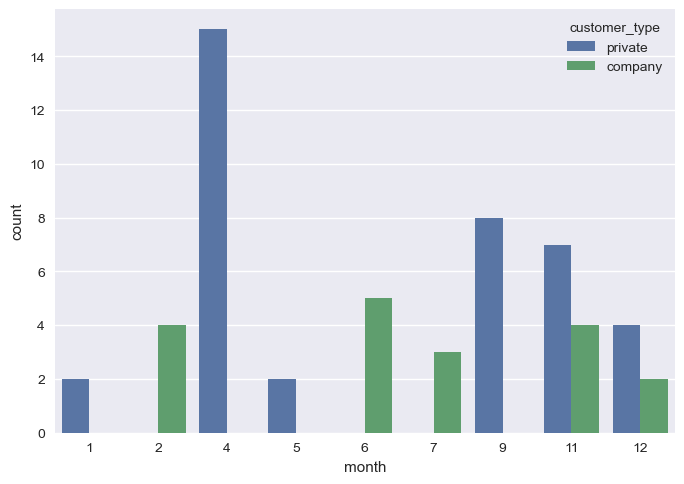

In [40]:
#כמה הזמנות יש לפי חודש עבור סוג לקוח? אציג את הנתונים בגרף countplot
#רואים בין היתר שבחודשים אפריל וספטמבר יש עלייה בכמות ההזמנות מלקוחות פרטיים, מה שמחזק את ההשערה הקודמת מגרף הקו שהסיבה היא החגים
sb.countplot(x='month',hue='customer_type',data=df1)

In [67]:
#מהי כמות ההזמנות לפי אופן ההזמנה?
#אפשר לראות שרוב ההזמנות נכנסו דרך האפליקציה בהשוואה לטלפון ולאתר
df1.groupby('order_source')['order_id'].count()

order_source
app      26
phone    12
site     18
Name: order_id, dtype: int64

In [43]:
#מהן ההכנסות לפי אופן ההזמנה? קיבצתי את הנתונים לפי אופן הזמנה וחישבתי את סכום החשבון עבור כל אופן הזמנה
#בהשוואה לכמות ההזמנות, גם כאן האפליקציה מובילה בכמות הזמנות שנכנסו לעומת האתר והטלפון, אם כי כאן הפער קטן יותר
df1.groupby('order_source')['Total_Bill'].sum()

order_source
app      4775.0
phone    3820.0
site     3880.0
Name: Total_Bill, dtype: float64

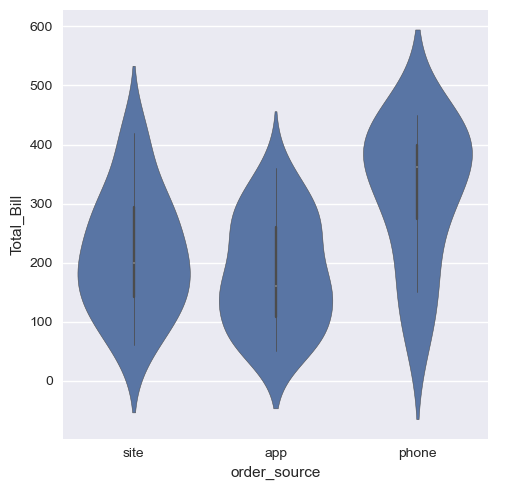

In [41]:
#כך זה נראה בגרף ויולין שמראה בתוכו את נקודת החציון, קצוות הקווים השחורים מצביעים על ערכי המינימום והמקסימום, והסכומים שנכנסו הכי הרבה פעמים מוצגים בגרף באיזורים הרחבים של כל אופן הזמנה
sb.catplot(data=df1,x='order_source',y='Total_Bill',kind='violin')

In [ ]:
#בפרויקט זה בדקתי בעיקר את כמות ההכנסות וההזמנות שהתקבלו לפי פרמטרים שונים שהנתונים הציגו. 
#התוצאות הבולטות מראות פער משמעותי בין הכנסות מלקוחות פרטיים לעומת מחברות.
#ייתכן שהסיבה היא שבחברות לרוב לא יזמינו אוכל טבעוני עבור כל העובדים אלא רק כמות קטנה לחלק, בעוד שייתכן שאצל לקוחות פרטיים ההזמנות הן עבור משפחה שלמה.
#העלייה שנרשמה בכמות הזמנות בחודשים מסויימים מקבלת חיזוק מבדיקה של הזמנות לפי סוג הלקוח, כאשר ניתן להניח שההזמנות הן בשל תקופת החגים.
#את התוצאות עבור מנות שהוזמנו מעט פעמים יש להמשיך ולבדוק בהמשך מול עלות הכנה כדי להבין האם ייתכן שעדיף להסיר מהתפריט מנה כזו או אחרת.
#בהקשר לכך ובאופן כללי יותר מומלץ לשמור על קשר טוב עם הלקוחות כדי להבין אם יש סיבה שמנות מסויימות לא הוזמנו (מחיר או עניין של טעם או סיבה אחרת) ולקחת זאת בחשבון.
#הממצאים על הכנסות והזמנות לפי אופן ההזמנה מלמדת שההחלטה להשקיע באפליקצייה היתה נכונה ולמרות שהדרכים האחרות היו יעילות פחות, עדיין הן תרמו להכנסות ועדיף לשמור עליהן.
#נתוני המקור מציגים רק את שנת 2022. אני ממליץ שבדיקה עתידית תכלול שנים נוספות שיאפשרו לקבל מסקנות יותר מובהקות